In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
# importing spark session to create a spark session for integration
from pyspark.sql import SparkSession


sparkDriver = SparkSession.builder.master('local').appName('pyspark_integration').getOrCreate()
sparkDriver


In [7]:
df_bd = sparkDriver.read.format('csv').option('header', 'true').option('inferSchema', 'true').load('hdfs://192.168.1.121:8020/user/cloudera/project/customer_shopping_data.csv'')

In [8]:
df_bd.show()

+----------+-----------+------+---+---------------+--------+-------+--------------+------------+-----------------+
|invoice_no|customer_id|gender|age|       category|quantity|  price|payment_method|invoice_date|    shopping_mall|
+----------+-----------+------+---+---------------+--------+-------+--------------+------------+-----------------+
|   I138884|    C241288|Female| 28|       Clothing|       5| 1500.4|   Credit Card|    5/8/2022|           Kanyon|
|   I317333|    C111565|  Male| 21|          Shoes|       3|1800.51|    Debit Card|  12/12/2021|   Forum Istanbul|
|   I127801|    C266599|  Male| 20|       Clothing|       1| 300.08|          Cash|   9/11/2021|        Metrocity|
|   I173702|    C988172|Female| 66|          Shoes|       5|3000.85|   Credit Card|  16/05/2021|     Metropol AVM|
|   I337046|    C189076|Female| 53|          Books|       4|   60.6|          Cash|  24/10/2021|           Kanyon|
|   I227836|    C657758|Female| 28|       Clothing|       5| 1500.4|   Credit Ca

In [9]:
df_bd.printSchema()


root
 |-- invoice_no: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- category: string (nullable = true)
 |-- quantity: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- invoice_date: string (nullable = true)
 |-- shopping_mall: string (nullable = true)



In [10]:
df_bd.describe().show()


+-------+----------+-----------+------+------------------+--------+------------------+-----------------+--------------+------------+-------------+
|summary|invoice_no|customer_id|gender|               age|category|          quantity|            price|payment_method|invoice_date|shopping_mall|
+-------+----------+-----------+------+------------------+--------+------------------+-----------------+--------------+------------+-------------+
|  count|     99457|      99457| 99457|             99457|   99457|             99457|            99457|         99457|       99457|        99457|
|   mean|      null|       null|  null| 43.42708909377922|    null| 3.003428617392441|689.2563209223512|          null|        null|         null|
| stddev|      null|       null|  null|14.990053791852413|    null|1.4130251343054316| 941.184567215463|          null|        null|         null|
|    min|   I100008|    C100004|Female|                18|   Books|                 1|             5.23|          Cash

In [11]:
from pyspark.sql.functions import col, count, when, isnan

null_check = df_bd.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_bd.columns])
null_check.show()


+----------+-----------+------+---+--------+--------+-----+--------------+------------+-------------+
|invoice_no|customer_id|gender|age|category|quantity|price|payment_method|invoice_date|shopping_mall|
+----------+-----------+------+---+--------+--------+-----+--------------+------------+-------------+
|         0|          0|     0|  0|       0|       0|    0|             0|           0|            0|
+----------+-----------+------+---+--------+--------+-----+--------------+------------+-------------+



In [12]:
df_bd_droped = df_bd.drop('invoice_no', 'customer_id', 'invoice_date')
df_bd_timeline = df_bd.drop('customer_id','gender','category','quantity','price','payment_method','shopping_mall')
df_bd_timeline.show()

+----------+---+------------+
|invoice_no|age|invoice_date|
+----------+---+------------+
|   I138884| 28|    5/8/2022|
|   I317333| 21|  12/12/2021|
|   I127801| 20|   9/11/2021|
|   I173702| 66|  16/05/2021|
|   I337046| 53|  24/10/2021|
|   I227836| 28|  24/05/2022|
|   I121056| 49|  13/03/2022|
|   I293112| 32|  13/01/2021|
|   I293455| 69|   4/11/2021|
|   I326945| 60|  22/08/2021|
|   I306368| 36|  25/12/2022|
|   I139207| 29|  28/10/2022|
|   I640508| 67|  31/07/2022|
|   I179802| 25|  17/11/2022|
|   I336189| 67|    3/6/2022|
|   I688768| 24|   7/11/2021|
|   I294687| 65|  16/01/2021|
|   I195744| 42|    5/1/2022|
|   I993048| 46|  26/07/2021|
|   I992454| 24|    7/3/2023|
+----------+---+------------+
only showing top 20 rows



In [13]:
df_bd_droped.show()

+------+---+---------------+--------+-------+--------------+-----------------+
|gender|age|       category|quantity|  price|payment_method|    shopping_mall|
+------+---+---------------+--------+-------+--------------+-----------------+
|Female| 28|       Clothing|       5| 1500.4|   Credit Card|           Kanyon|
|  Male| 21|          Shoes|       3|1800.51|    Debit Card|   Forum Istanbul|
|  Male| 20|       Clothing|       1| 300.08|          Cash|        Metrocity|
|Female| 66|          Shoes|       5|3000.85|   Credit Card|     Metropol AVM|
|Female| 53|          Books|       4|   60.6|          Cash|           Kanyon|
|Female| 28|       Clothing|       5| 1500.4|   Credit Card|   Forum Istanbul|
|Female| 49|      Cosmetics|       1|  40.66|          Cash|     Istinye Park|
|Female| 32|       Clothing|       2| 600.16|   Credit Card| Mall of Istanbul|
|  Male| 69|       Clothing|       3| 900.24|   Credit Card|        Metrocity|
|Female| 60|       Clothing|       2| 600.16|   Cred

In [14]:
import pandas as pd
panda_df_bd = df_bd_droped.sample(fraction=0.1).toPandas()

panda_df_bd.head()

gender  age         category  quantity    price payment_method  \
0    Male   21            Shoes         3  1800.51     Debit Card   
1  Female   28         Clothing         5  1500.40    Credit Card   
2  Female   42  Food & Beverage         3    15.69    Credit Card   
3  Female   46         Clothing         2   600.16           Cash   
4    Male   52         Clothing         2   600.16    Credit Card   

    shopping_mall  
0  Forum Istanbul  
1  Forum Istanbul  
2    Zorlu Center  
3    Metropol AVM  
4     Cevahir AVM

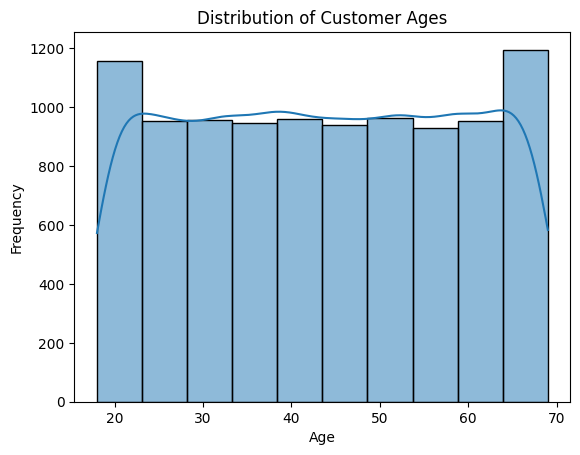

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(panda_df_bd['age'], bins=10, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


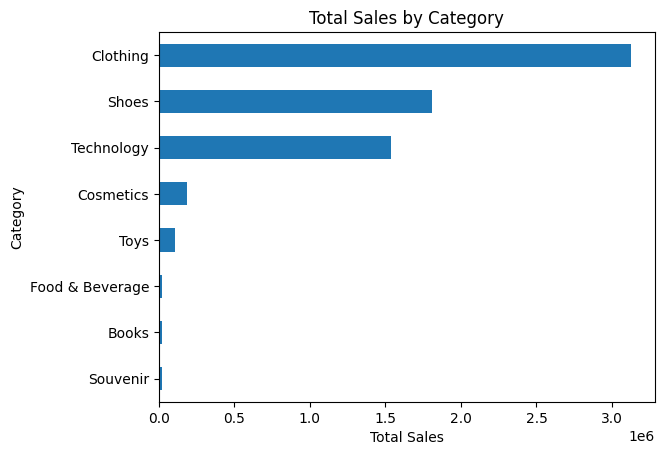

In [16]:
category_sales = panda_df_bd.groupby('category')['price'].sum().sort_values()
category_sales.plot(kind='barh')
plt.title('Total Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()

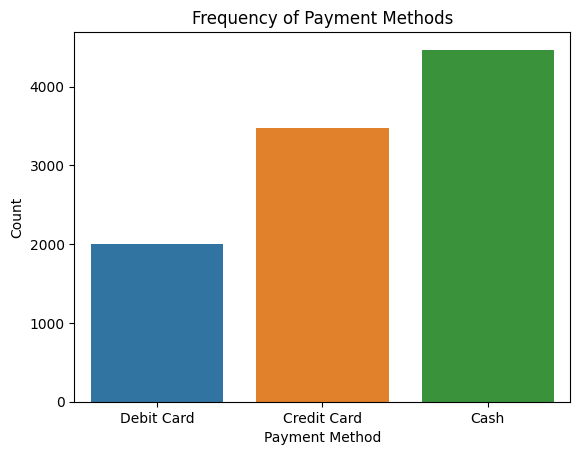

In [17]:
sns.countplot(data=panda_df_bd, x='payment_method')
plt.title('Frequency of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


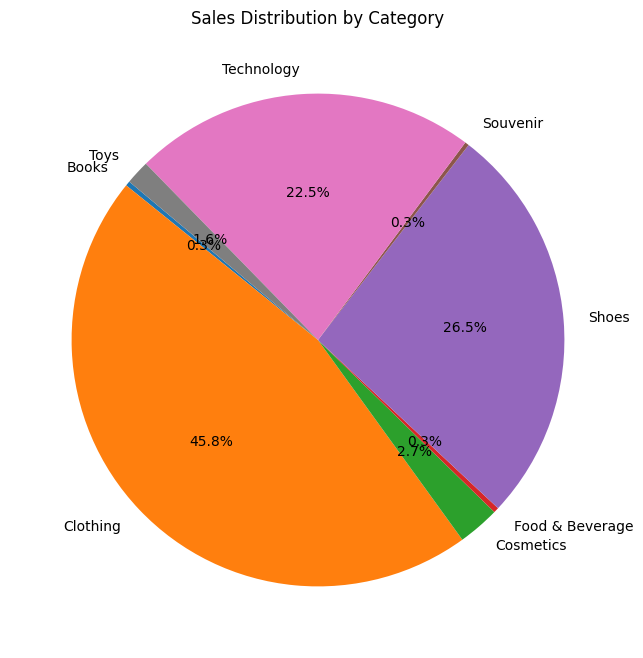

In [18]:
import matplotlib.pyplot as plt

# pie chart of sales by category

sales_by_category = panda_df_bd.groupby('category')['price'].sum()

# pie chart plotting 
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%',startangle=140)
plt.title('Sales Distribution by Category')
plt.show()


In [50]:
# calculating the price data by category sampled data
Purchase_data =panda_df_bd.groupby('category')['price'].sum()
Purchase_data = Purchase_data.reset_index() 
Purchase_data.head()

category       price
0            Books    21513.00
1         Clothing  3126533.52
2        Cosmetics   186873.36
3  Food & Beverage    23545.46
4            Shoes  1810112.72

In [147]:
# calculating the frequency of the same customer

panda_df_bd_1 = df_bd.sample(fraction=0.1).toPandas()

frequency=panda_df_bd_1.groupby('customer_id')['invoice_no'].count()
frequency = frequency.reset_index()
frequency.head()

customer_id  invoice_no
0     C100005           1
1     C100019           1
2     C100042           1
3     C100096           1
4     C100148           1

In [19]:
# imports for running machine learning with randomforest
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [20]:
# data precpocessing - converting categorical data to numeric - taking gender as label column

# StringIndexer for converting the categorical data to use for classifier
indexer_gender = StringIndexer(inputCol="gender", outputCol="label")
indexer_category = StringIndexer(inputCol="category", outputCol="category_index")
indexer_payment = StringIndexer(inputCol="payment_method", outputCol="payment_index")
indexer_mall = StringIndexer(inputCol="shopping_mall", outputCol="mall_index")

df_bd_droped = indexer_gender.fit(df_bd_droped).transform(df_bd_droped)
df_bd_droped = indexer_category.fit(df_bd_droped).transform(df_bd_droped)
df_bd_droped = indexer_payment.fit(df_bd_droped).transform(df_bd_droped)
df_bd_droped = indexer_mall.fit(df_bd_droped).transform(df_bd_droped)

df_bd_droped.show()

+------+---+---------------+--------+-------+--------------+-----------------+-----+--------------+-------------+----------+
|gender|age|       category|quantity|  price|payment_method|    shopping_mall|label|category_index|payment_index|mall_index|
+------+---+---------------+--------+-------+--------------+-----------------+-----+--------------+-------------+----------+
|Female| 28|       Clothing|       5| 1500.4|   Credit Card|           Kanyon|  0.0|           0.0|          1.0|       1.0|
|  Male| 21|          Shoes|       3|1800.51|    Debit Card|   Forum Istanbul|  1.0|           4.0|          2.0|       7.0|
|  Male| 20|       Clothing|       1| 300.08|          Cash|        Metrocity|  1.0|           0.0|          0.0|       2.0|
|Female| 66|          Shoes|       5|3000.85|   Credit Card|     Metropol AVM|  0.0|           4.0|          1.0|       3.0|
|Female| 53|          Books|       4|   60.6|          Cash|           Kanyon|  0.0|           7.0|          0.0|       1.0|


In [21]:
# transforming the features to vector format - avoiding the label and gender column as they are targets

feature_cols = ['age', 'quantity','price','category_index', 'payment_index', 'mall_index']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

df_rf = assembler.transform(df_bd_droped)

df_rf.show()

+------+---+---------------+--------+-------+--------------+-----------------+-----+--------------+-------------+----------+--------------------+
|gender|age|       category|quantity|  price|payment_method|    shopping_mall|label|category_index|payment_index|mall_index|            features|
+------+---+---------------+--------+-------+--------------+-----------------+-----+--------------+-------------+----------+--------------------+
|Female| 28|       Clothing|       5| 1500.4|   Credit Card|           Kanyon|  0.0|           0.0|          1.0|       1.0|[28.0,5.0,1500.4,...|
|  Male| 21|          Shoes|       3|1800.51|    Debit Card|   Forum Istanbul|  1.0|           4.0|          2.0|       7.0|[21.0,3.0,1800.51...|
|  Male| 20|       Clothing|       1| 300.08|          Cash|        Metrocity|  1.0|           0.0|          0.0|       2.0|[20.0,1.0,300.08,...|
|Female| 66|          Shoes|       5|3000.85|   Credit Card|     Metropol AVM|  0.0|           4.0|          1.0|       3.0|

In [29]:
# random forest implementation

# Spliting the data into training and test sets
train_data, test_data = df_rf.randomSplit([0.7, 0.3])

# Initializing the Random Forest Classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Grid Search for hyperparameter tuning
paramGrid = ParamGridBuilder() \
    .addGrid(rf.maxDepth, [5, 6, 8]) \
    .addGrid(rf.maxBins, [14,18,20]) \
    .addGrid(rf.impurity, ["gini", "entropy"]) \
    .build()

# Evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

In [30]:
# using parameter grid in the crossvalidator

crossval = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
cv_model = crossval.fit(train_data)



In [32]:
# Best model evaluation

best_rf_model = cv_model.bestModel
best_maxDepth = best_rf_model.getOrDefault("maxDepth")
best_maxBins = best_rf_model.getOrDefault("maxBins")
best_impurity = best_rf_model.getOrDefault("impurity")
bestAccuracy = evaluator.evaluate(best_rf_model.transform(test_data))

# printing the accuray and best parameters
print("Best model accuracy = " + str(bestAccuracy))
print("Best model depth = " + str(best_maxDepth))
print("Best model bins = " + str(best_maxBins))
print("Best model impurity classifier = " + str(best_impurity))

Best model accuracy = 0.6025615369221533
Best model depth = 6
Best model bins = 18
Best model impurity classifier = entropy


In [148]:
# Evaluator
evaluator_2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
best_F1 = evaluator_2.evaluate(best_rf_model.transform(test_data))

print("Best model F1 score = " + str(best_F1))


Best model F1 score = 0.4531250718463046


In [40]:
evaluator_3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
evaluator_4 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")

best_recall = evaluator_3.evaluate(best_rf_model.transform(test_data))
best_precision = evaluator_4.evaluate(best_rf_model.transform(test_data))
print("Best model recall score = " + str(best_recall))
print("Best model precision score = " + str(best_precision))


Best model recall score = 0.6025615369221533
Best model precision score = 0.3630804057779875


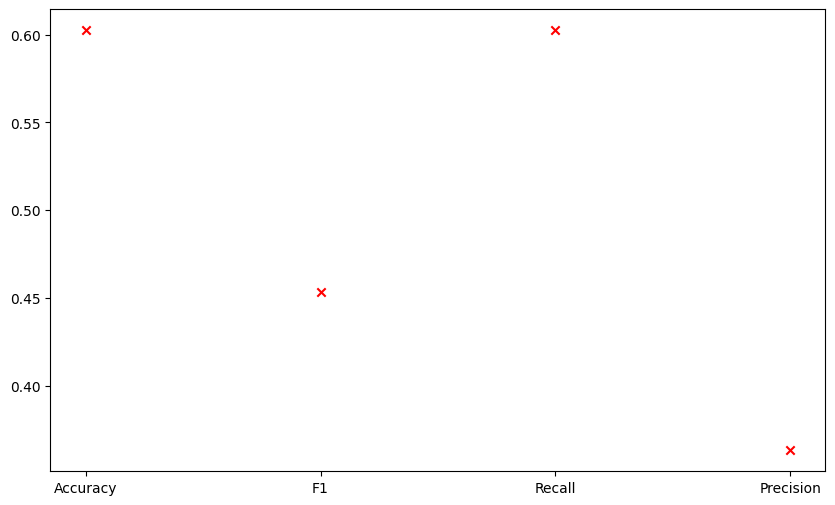

In [44]:
# Data points for axis
metrics = ['Accuracy','F1', 'Recall', 'Precision']
accuracies = [bestAccuracy,best_F1,best_recall,best_precision]

# plotting a scatter plot for metrics
plt.figure(figsize=(10, 6))
plt.scatter(metrics, accuracies, color='red', marker='x', label='Data Points')

plt.show()

In [64]:
df_rf.select('features').show()

+--------------------+
|            features|
+--------------------+
|[28.0,5.0,1500.4,...|
|[21.0,3.0,1800.51...|
|[20.0,1.0,300.08,...|
|[66.0,5.0,3000.85...|
|[53.0,4.0,60.6,7....|
|[28.0,5.0,1500.4,...|
|[49.0,1.0,40.66,1...|
|[32.0,2.0,600.16,...|
|[69.0,3.0,900.24,...|
|[60.0,2.0,600.16,...|
|[36.0,2.0,10.46,2...|
|[29.0,1.0,15.15,7...|
|[67.0,4.0,143.36,...|
|[25.0,2.0,600.16,...|
|[67.0,2.0,600.16,...|
|[24.0,5.0,3000.85...|
|[65.0,2.0,30.3,7....|
|[42.0,3.0,15.69,2...|
|[46.0,2.0,600.16,...|
|[24.0,4.0,143.36,...|
+--------------------+
only showing top 20 rows



In [101]:
# data preprocessing for clustering of data

feature_cols = ['gender','age', 'quantity','price','category_index', 'payment_index', 'mall_index']
assembler_2 = VectorAssembler(inputCols=feature_cols, outputCol="features")

df_kc = assembler.transform(df_bd_droped)

df_kc.select('features').show()


+--------------------+
|            features|
+--------------------+
|[28.0,5.0,1500.4,...|
|[21.0,3.0,1800.51...|
|[20.0,1.0,300.08,...|
|[66.0,5.0,3000.85...|
|[53.0,4.0,60.6,7....|
|[28.0,5.0,1500.4,...|
|[49.0,1.0,40.66,1...|
|[32.0,2.0,600.16,...|
|[69.0,3.0,900.24,...|
|[60.0,2.0,600.16,...|
|[36.0,2.0,10.46,2...|
|[29.0,1.0,15.15,7...|
|[67.0,4.0,143.36,...|
|[25.0,2.0,600.16,...|
|[67.0,2.0,600.16,...|
|[24.0,5.0,3000.85...|
|[65.0,2.0,30.3,7....|
|[42.0,3.0,15.69,2...|
|[46.0,2.0,600.16,...|
|[24.0,4.0,143.36,...|
+--------------------+
only showing top 20 rows



In [108]:
from pyspark.ml.feature import StandardScaler

#scaling the columns
scaler_1 = StandardScaler(inputCol='features', outputCol='scaled_features', withStd=True, withMean=True)

# feature scaling
scaled_df = scaler.fit(df_kc)
df_kc = scaled_df.transform(df_kc)





In [109]:
df_kc.select('scaled_features').show()

+--------------------+
|     scaled_features|
+--------------------+
|[-1.0291550189208...|
|[-1.4961313284925...|
|[-1.5628422298599...|
|[1.50585923303959...|
|[0.63861751526364...|
|[-1.0291550189208...|
|[0.37177390979412...|
|[-0.7623114134513...|
|[1.70599193714173...|
|[1.10559382483531...|
|[-0.4954678079818...|
|[-0.9624441175534...|
|[1.57257013440697...|
|[-1.2292877230230...|
|[1.57257013440697...|
|[-1.2959986243904...|
|[1.43914833167221...|
|[-0.0952023997775...|
|[0.17164120569197...|
|[-1.2959986243904...|
+--------------------+
only showing top 20 rows



In [111]:
# K means clustering for segmentation
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.clustering import KMeans

k_means = KMeans(featuresCol='scaled_features', k=4)
model = k_means.fit(df_kc)
predictions = model.transform(df_kc)

result = predictions.select('payment_method', 'prediction','gender')


In [112]:
result.show()

+--------------+----------+------+
|payment_method|prediction|gender|
+--------------+----------+------+
|   Credit Card|         1|Female|
|    Debit Card|         3|  Male|
|          Cash|         1|  Male|
|   Credit Card|         0|Female|
|          Cash|         2|Female|
|   Credit Card|         3|Female|
|          Cash|         2|Female|
|   Credit Card|         1|Female|
|   Credit Card|         2|  Male|
|   Credit Card|         2|Female|
|          Cash|         1|Female|
|   Credit Card|         3|Female|
|    Debit Card|         2|Female|
|          Cash|         3|  Male|
|   Credit Card|         2|Female|
|   Credit Card|         0|  Male|
|    Debit Card|         2|  Male|
|   Credit Card|         3|Female|
|          Cash|         2|Female|
|          Cash|         3|  Male|
+--------------+----------+------+
only showing top 20 rows



In [119]:
# Evaluator to find the silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print(f"Silhouette with squared euclidean distance = {silhouette}")



Silhouette with squared euclidean distance = 0.048924394681110574


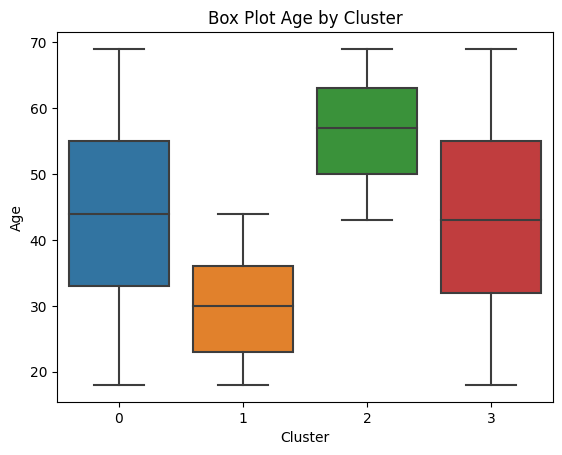

In [149]:
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = predictions.sample(fraction=0.1).toPandas()


# box plot to visualize age by clusters
sns.boxplot(x='prediction', y='age', data=pandas_df)

plt.title('Box Plot Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')  
plt.show()


# Displaying the plots

plt.show()

In [141]:


scatter_df = pandas_df[['age', 'quantity', 'price', 'label', 'category_index', 'payment_index', 'mall_index', 'prediction']]

pandas_df.head()

gender  age         category  quantity    price payment_method  \
0    Male   24            Shoes         5  3000.85    Credit Card   
1    Male   23         Clothing         1   300.08    Credit Card   
2  Female   33         Clothing         1   300.08     Debit Card   
3  Female   63  Food & Beverage         3    15.69           Cash   
4  Female   44       Technology         5  5250.00    Credit Card   

       shopping_mall  label  category_index  payment_index  mall_index  \
0     Viaport Outlet    1.0             4.0            1.0         8.0   
1  Emaar Square Mall    1.0             0.0            1.0         9.0   
2             Kanyon    0.0             0.0            2.0         1.0   
3        Cevahir AVM    0.0             2.0            0.0         6.0   
4   Mall of Istanbul    0.0             6.0            1.0         0.0   

                              features  \
0  [24.0, 5.0, 3000.85, 4.0, 1.0, 8.0]   
1   [23.0, 1.0, 300.08, 0.0, 1.0, 9.0]   
2   [33.0, 1.0, 300.08, 0.0, 2.0, 1.0]   
3    [63.0, 3.0, 15.69, 2.0, 0.0, 6.0]   
4   [44.0, 5.0, 5250.0, 6.0, 1.0, 0.0]   

                                     scaled_features  prediction  
0  [-1.295998624390401, 1.4129765523165982, 2.456...           0  
1  [-1.3627095257577817, -1.417829427625286, -0.4...           3  
2  [-0.695600512083973, -1.417829427625286, -0.41...           1  
3  [1.3057265289374533, -0.0024264376543439953, -...           3  
4  [0.03821940295721664, 1.4129765523165982, 4.84...           0

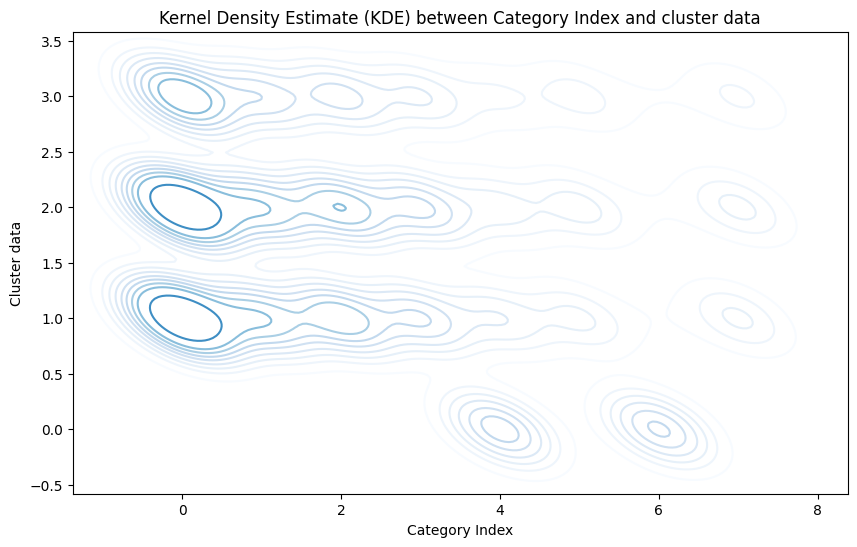

In [152]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=scatter_df, x='category_index', y='prediction', cmap="Blues")
plt.title('Kernel Density Estimate (KDE) between Category Index and cluster data')
plt.xlabel('Category Index')
plt.ylabel('Cluster data')
plt.show()

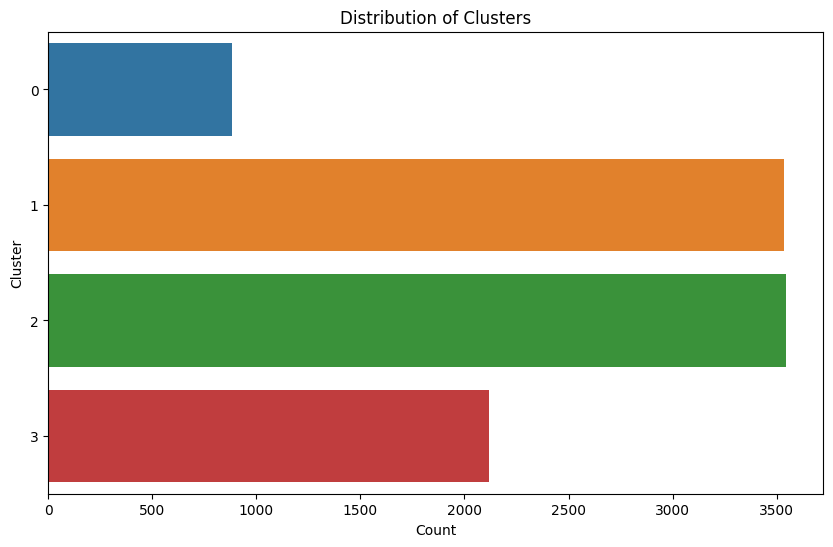

In [146]:
cluster_counts = scatter_df['prediction'].value_counts().sort_index()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts, y=cluster_counts.index, orient='h')
plt.title('Distribution of Clusters')
plt.xlabel('Count')
plt.ylabel('Cluster')
plt.show()